In [ ]:
!pip install monai

In [ ]:
!pip install glob2

In [ ]:
import os
from glob import glob
from tqdm.notebook import tqdm

#Folder Management 

In [ ]:
data_dir = "C:/Users/RAZER/Downloads/dataset/Task09_Spleen/Task09_Spleen"

train_images = sorted(glob(os.path.join(data_dir, 'imagesTr' ,"*.nii.gz")))
test_images = sorted(glob(os.path.join(data_dir, 'imagesTs',"*.nii.gz")))

train_labels = sorted(glob(os.path.join(data_dir, 'labelsTr',"*.nii.gz")))
test_labels = sorted(glob(os.path.join(data_dir, 'labelsTs',"*.nii.gz")))

#Making a list of dictionary where each dictionary will have single set of image and label

In [ ]:


def train_test_list(images,labels):
    f=[]
    if len(images)!=len(labels):
        return "Invalid Length"
    
    for i in tqdm(range(len(images))):
                   d = {'image': images[i],"label":labels[i]}
                   f.append(d)
    return f


def check_train_test_list(files):
    for i in tqdm(files):
        img = os.path.basename(os.path.normpath(i['image']))
        lab = os.path.basename(os.path.normpath(i['label'])) 
        if img==lab:
            print('OK')
        else:
            print("Not OK", i)
            break


In [ ]:
train_files = train_test_list(train_images,train_labels)
               
                
test_files = train_test_list(test_images,test_labels)


check_train_test_list(train_files)
check_train_test_list(test_files)

In [ ]:
print(train_files)
print(test_files)

In [ ]:
#train_files = [{'image': image_name, 'label':label_name} for image_name,label_name in zip(train_images,train_labels)]

#Compose 

In [31]:
import torch
from monai.transforms import (
    
    Compose,
    LoadImaged,
    ToTensord,
    AddChanneld,
    Spacingd

)# if dictionary is being used, then an additional 'd' must be add after the funciton name


from monai.data import Dataset, DataLoader       #dataset loader or preview images from dataset
from monai.utils import first
import matplotlib.pyplot as plt

In [ ]:
#load the images
#any transforms
#need to convert them into torch tensor

train_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        
        ToTensord(keys=['image','label']),

        
        
    ]


)


train_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        ToTensord(keys=['image','label']),   
    ]


)

test_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        ToTensord(keys=['image','label']),
    ]


)

In [ ]:
#transforming all training and testing datset

train_ds = Dataset(data=train_files, transform=train_transforms)
train_loader = DataLoader(train_ds, batch_size=1)

test_ds = Dataset(data=test_files, transform=test_transforms)
test_loader = DataLoader(test_ds, batch_size=1)

In [ ]:
test_patient = first(train_loader) #selecting the frist patient
print(test_patient['image'])

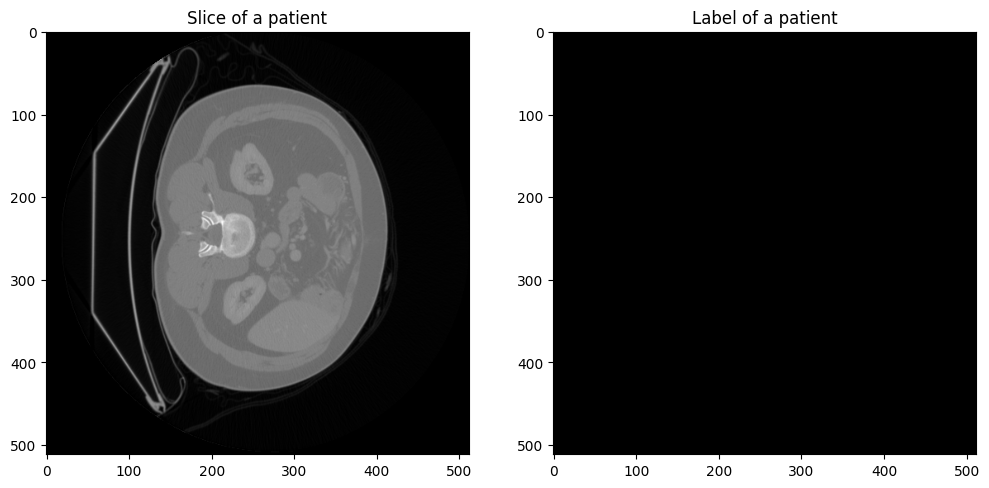

In [21]:
plt.figure('test',(12,6))
plt.subplot(1,2,1)
plt.title("Slice of a patient")
plt.imshow(test_patient['image'][0,0,:,:,39], cmap = 'gray') #[][batch size(the item),channel(0-> signle channle (forground/background), 
                                                                                            #1-> multiple channel(forground+background)),
                                                                                            #width,height,slice ]


plt.subplot(1,2,2)
plt.title("Label of a patient")
plt.imshow(test_patient['label'][0,0,:,:,39],cmap = 'gray') 
plt.show()

In [42]:
#load the images
#any transforms
#need to convert them into torch tensor




post_train_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        Spacingd(keys = ['image', 'label'], pixdim = (1.5, 1.5, 2)), #(height,width,depth) for resize the
        ToTensord(keys=['image','label']),   
    ]


)

post_test_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        ToTensord(keys=['image','label']),
    ]


)

In [43]:
train_ds = Dataset(data=train_files, transform=post_train_transforms)
train_loader = DataLoader(train_ds, batch_size=1)

test_ds = Dataset(data=test_files, transform=post_test_transforms)
test_loader = DataLoader(test_ds, batch_size=1)

In [44]:
test_patient = first(train_loader) #selecting the frist patient

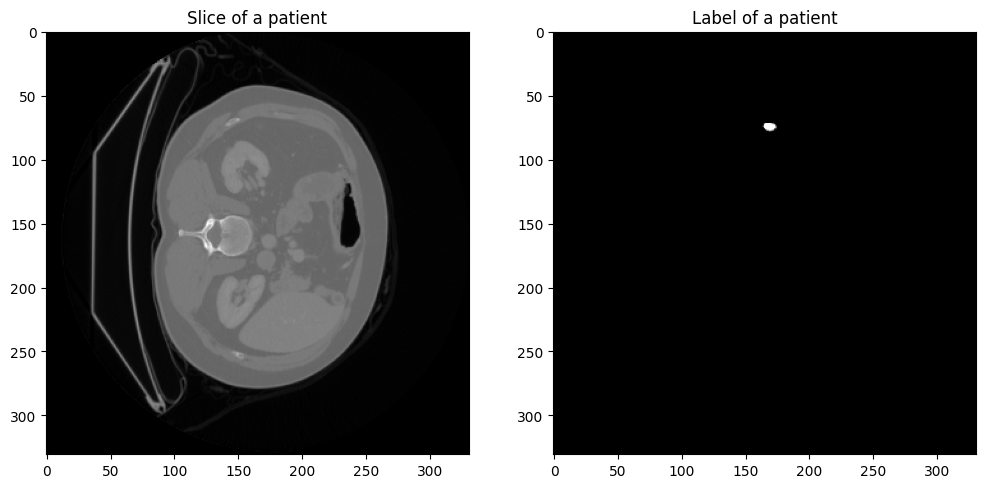

In [45]:
plt.figure('test',(12,6))
plt.subplot(1,2,1)
plt.title("Slice of a patient")
plt.imshow(test_patient['image'][0,0,:,:,39], cmap = 'gray') #[][batch size(the item),channel(0-> signle channle (forground/background), 
                                                                                            #1-> multiple channel(forground+background)),
                                                                                            #width,height,slice ]


plt.subplot(1,2,2)
plt.title("Label of a patient")
plt.imshow(test_patient['label'][0,0,:,:,39],cmap = 'gray') 
plt.show()